<div style="text-align:center;">
    <h1 style="font-size:40px; color:#2E86C1;">Communication Systems Final Project</h1>
    <h2 style="font-size:30px; color:#117A65;">Iman Alizadeh Fakouri (401102134)</h2>
</div>

---

##  Project Overview
This project aims to analyze and implement various communication system techniques using Python.

---


# **Image Pre-Processing**

In [2]:
import cv2
import numpy as np
from skimage.util import view_as_blocks
from scipy.fftpack import dct


image = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float64)


m, n = image.shape
m, n = (m // 8) * 8, (n // 8) * 8
image = image[:m, :n]

block_size = 8
blocks = view_as_blocks(image, block_shape=(block_size, block_size))


dct_blocks = np.zeros_like(blocks, dtype=np.float64)
for i in range(blocks.shape[0]):
    for j in range(blocks.shape[1]):
        dct_blocks[i, j] = dct(dct(blocks[i, j], axis=0, norm='ortho'), axis=1, norm='ortho')


min_val, max_val = dct_blocks.min(), dct_blocks.max()
scaled_blocks = (dct_blocks - min_val) / (max_val - min_val)
scaling_constants = {"min": min_val, "max": max_val}

# Quantization
quantized_blocks = np.round(scaled_blocks * 255).astype(np.uint8)

#
permuted_blocks = quantized_blocks.transpose(2, 3, 0, 1)
reshaped_data = permuted_blocks.reshape((8, 8, -1))

print(f"Image shape: {image.shape}")
print(f"Quantized 3D Data Shape: {reshaped_data.shape}")


Image shape: (256, 256)
Quantized 3D Data Shape: (8, 8, 1024)


# **Converting into Bitstream**

In [3]:

N = 4  #Changeble


num_blocks = reshaped_data.shape[2]
block_size = 8 * 8


if num_blocks % N != 0:
    padding = N - (num_blocks % N)
    reshaped_data = np.pad(reshaped_data, ((0, 0), (0, 0), (0, padding)), mode='constant')
    num_blocks += padding


grouped_blocks = reshaped_data.reshape(block_size, num_blocks)
grouped_blocks = grouped_blocks[:, :num_blocks]


num_groups = num_blocks // N
print(num_groups)
column_vectors = grouped_blocks.reshape(block_size * N, num_groups)


binary_matrix = np.unpackbits(column_vectors.astype(np.uint8), axis=0)

256


In [4]:
print(f"image:{image[0]}")
print(f"dct_blocks:{dct_blocks[0]}")
print(f"scaled_blocks:{scaled_blocks[0]}")
print(f"quantized_blocks:{quantized_blocks[0]}")
print(f"permuted_blocks:{permuted_blocks[0]}")
print(f"reshaped_data:{reshaped_data[0]} ")
print(f"grouped_blocks:{grouped_blocks[0]}")
print(f"column_vectors:{column_vectors[0]}")
print(f"binary_matrix:{binary_matrix[0]}")



image:[156. 159. 158. 155. 158. 156. 159. 158. 157. 158. 158. 159. 160. 160.
 160. 158. 163. 161. 162. 160. 164. 160. 165. 163. 161. 163. 161. 164.
 165. 162. 161. 165. 165. 164. 166. 165. 164. 166. 167. 165. 165. 164.
 170. 166. 167. 167. 170. 168. 169. 166. 169. 167. 170. 169. 169. 171.
 169. 171. 169. 171. 170. 169. 173. 173. 172. 171. 173. 176. 174. 176.
 180. 179. 178. 178. 181. 181. 181. 177. 180. 178. 179. 180. 180. 180.
 178. 184. 181. 182. 183. 182. 183. 181. 182. 183. 182. 185. 184. 181.
 181. 183. 184. 183. 184. 183. 186. 186. 187. 184. 183. 185. 185. 185.
 182. 183. 186. 182. 184. 187. 185. 188. 185. 185. 186. 184. 184. 182.
 186. 186. 185. 181. 186. 182. 182. 185. 183. 180. 181. 182. 181. 185.
 182. 186. 182. 181. 183. 182. 181. 181. 181. 179. 181. 177. 180. 181.
 178. 178. 180. 179. 180. 177. 179. 180. 178. 176. 178. 174. 177. 178.
 173. 177. 177. 176. 172. 172. 172. 176. 174. 177. 173. 173. 169. 172.
 169. 171. 167. 167. 166. 167. 168. 168. 168. 168. 169. 166. 169. 165.


# **Modulation(Sin)**

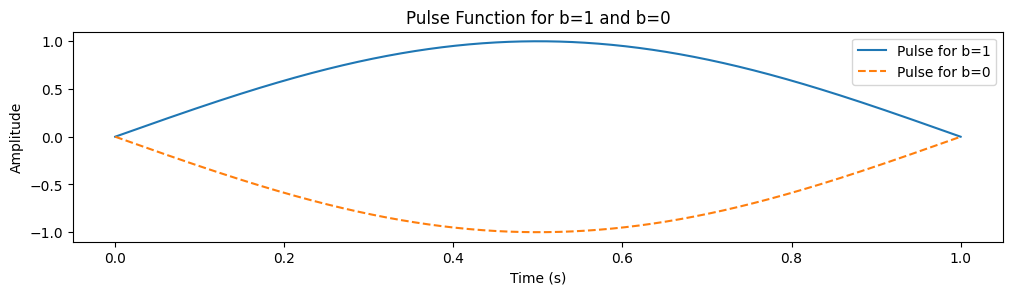

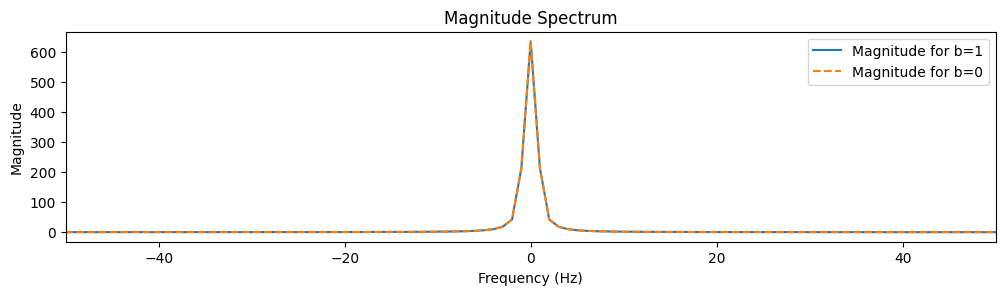

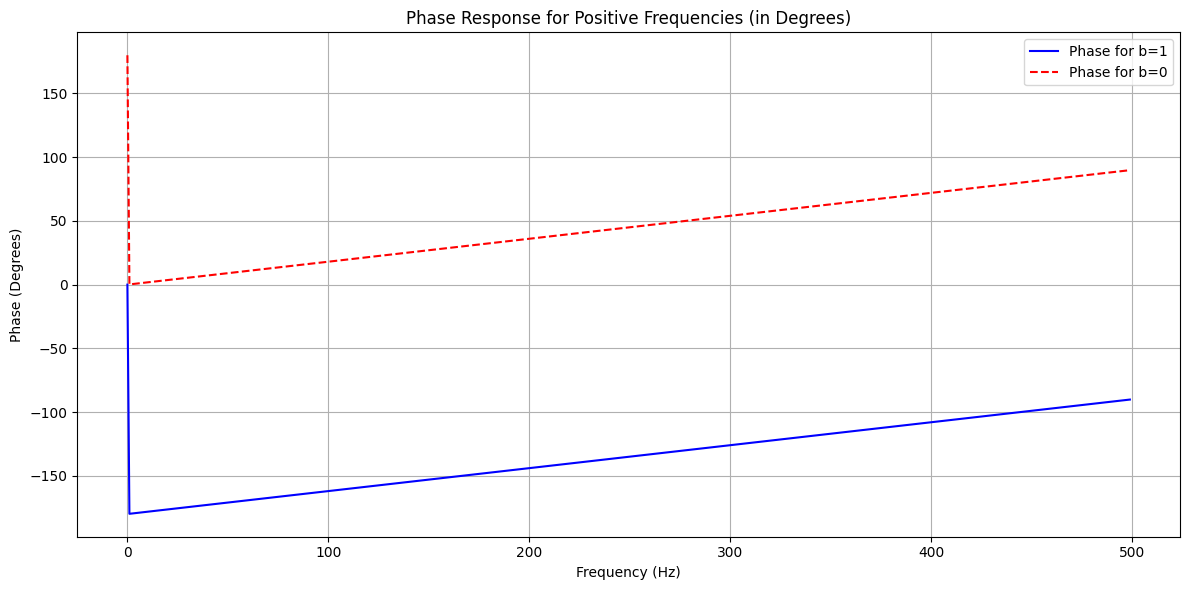

In [5]:
import matplotlib.pyplot as plt

T = 1
Fs = 1000
t = np.linspace(0, T, Fs)

g1_t_b1 = np.sin(np.pi * t / T)
g1_t_b0 = -np.sin(np.pi * t / T)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, g1_t_b1, label='Pulse for b=1')
plt.plot(t, g1_t_b0, label='Pulse for b=0', linestyle='--')
plt.title('Pulse Function for b=1 and b=0')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()


f = np.fft.fftfreq(len(t), d=1/Fs)
G1_F_b1 = np.fft.fft(g1_t_b1)
G1_F_b0 = np.fft.fft(g1_t_b0)
f_shifted = np.fft.fftshift(f)
G1_F_b1_shifted = np.fft.fftshift(G1_F_b1)
G1_F_b0_shifted = np.fft.fftshift(G1_F_b0)


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(f_shifted, np.abs(G1_F_b1_shifted), label='Magnitude for b=1')
plt.plot(f_shifted, np.abs(G1_F_b0_shifted), label='Magnitude for b=0', linestyle='--')
plt.xlim([-50, 50])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()


positive_freqs = f[f >= 0]
G1_F_b1_pos = G1_F_b1[:len(positive_freqs)]
G1_F_b0_pos = G1_F_b0[:len(positive_freqs)]
phase_b1_deg = np.angle(G1_F_b1_pos, deg=True)
phase_b0_deg = np.angle(G1_F_b0_pos, deg=True)
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, phase_b1_deg, label='Phase for b=1', color='b')
plt.plot(positive_freqs, phase_b0_deg, label='Phase for b=0', linestyle='--', color='r')
plt.title('Phase Response for Positive Frequencies (in Degrees)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (Degrees)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Random Bits: [1 0 1 1 0 1 1 1 0 0]


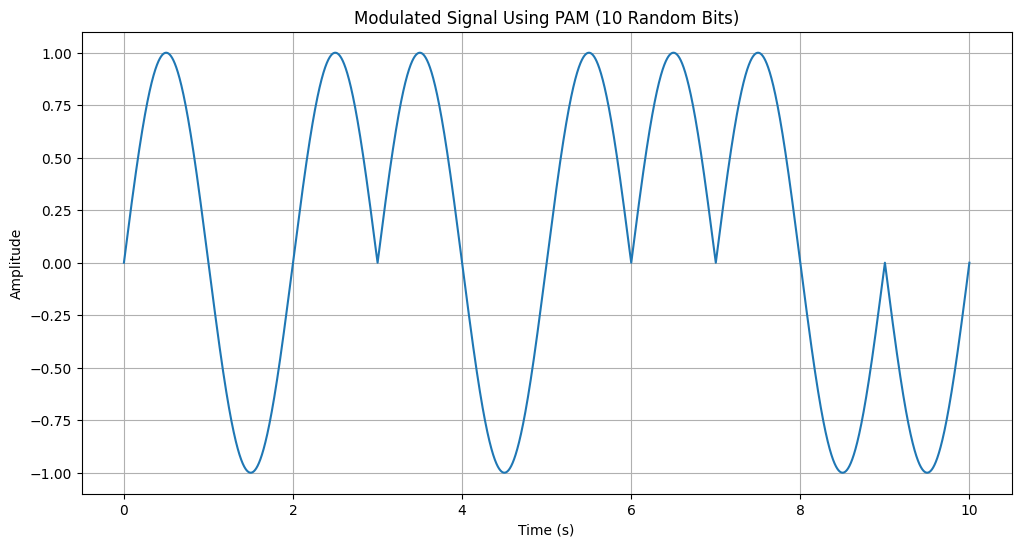

In [6]:
bits = np.random.randint(0, 2, 10)
print("Random Bits:", bits)


modulated_signal = []
for bit in bits:
    if bit == 1:
        modulated_signal.extend(g1_t_b1)
    else:
        modulated_signal.extend(g1_t_b0)

t_modulated = np.linspace(0, T*len(bits), len(modulated_signal))

plt.figure(figsize=(12, 6))
plt.plot(t_modulated, modulated_signal)
plt.title('Modulated Signal Using PAM (10 Random Bits)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


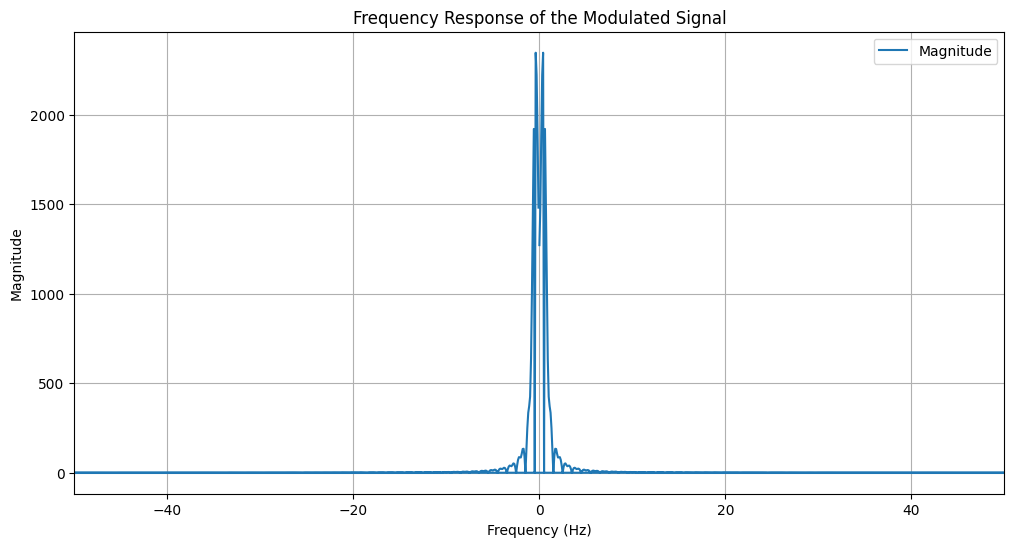

In [7]:
modulated_signal_F = np.fft.fft(modulated_signal)
f_modulated = np.fft.fftfreq(len(t_modulated), d=1/Fs)


plt.figure(figsize=(12, 6))
plt.plot(f_modulated, np.abs(modulated_signal_F), label='Magnitude')
plt.title('Frequency Response of the Modulated Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([-50, 50])
plt.grid(True)
plt.legend()
plt.show()


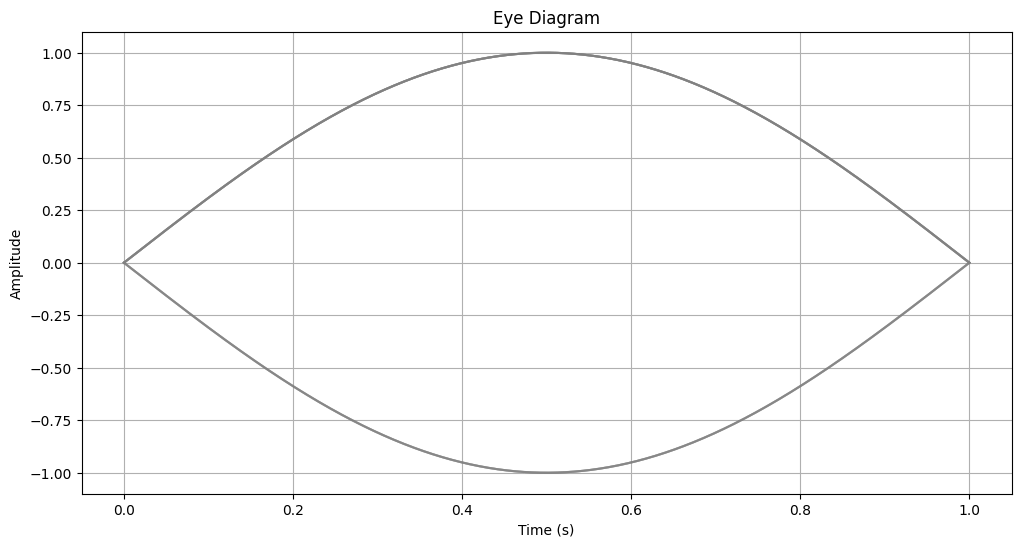

In [8]:
def plot_eye_diagram(signal, symbol_length, samples_per_symbol, num_symbols):
    plt.figure(figsize=(12, 6))
    time_per_symbol = np.linspace(0, T, samples_per_symbol)

    for i in range(num_symbols):
        start_idx = i * samples_per_symbol
        end_idx = start_idx + samples_per_symbol
        if end_idx <= len(signal):
            plt.plot(time_per_symbol, signal[start_idx:end_idx], color='gray', alpha=0.5)

    plt.title('Eye Diagram')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

plot_eye_diagram(modulated_signal, T, Fs, num_symbols=10)

# **Modulation(SRRC)**

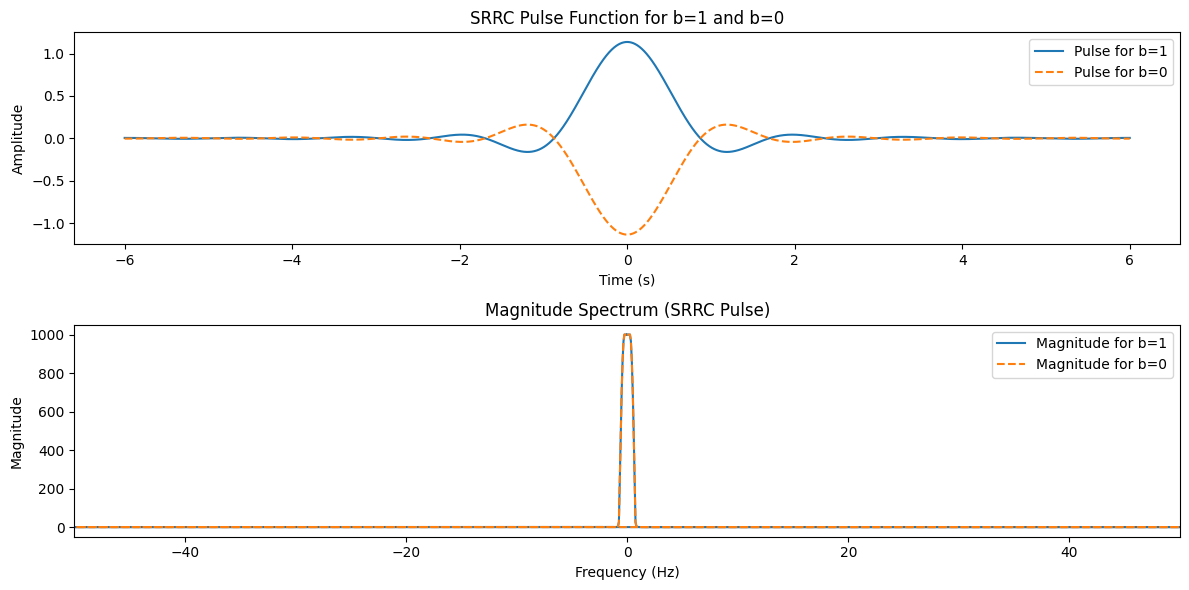

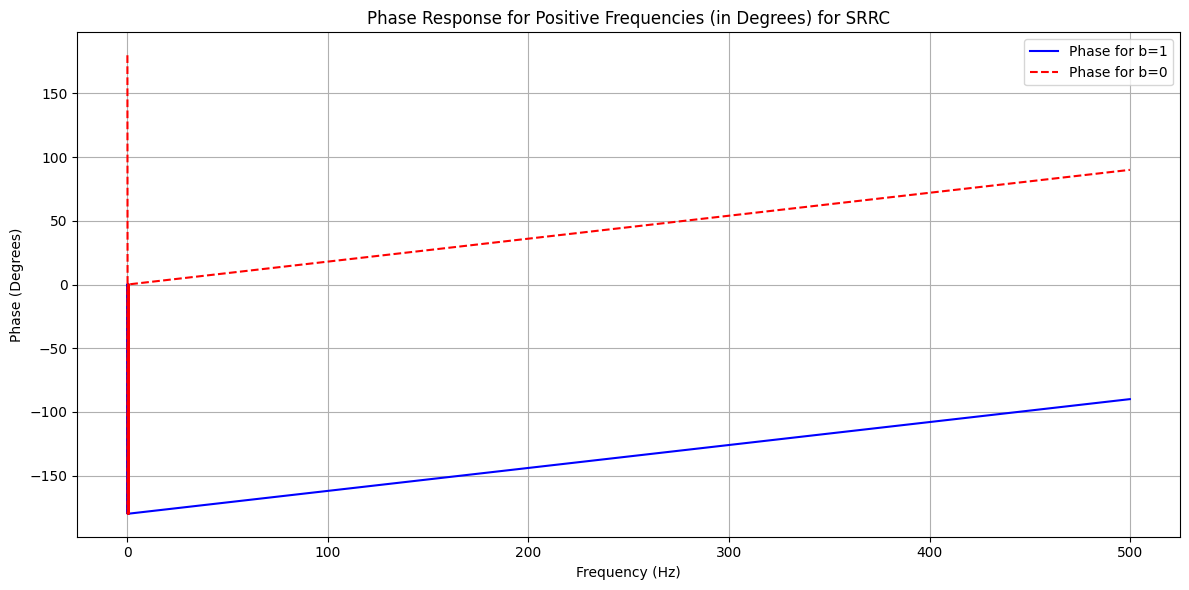

In [9]:
T = 1
Fs = 1000
K = 6
b = 0.5
A = 1


t = np.linspace(-K*T, K*T, Fs * 2 * K)
def srrc_pulse(t, T, b):
    numerator = np.sin(np.pi * t / T * (1 - b)) + 4 * b * t / T * np.cos(np.pi * t / T * (1 + b))
    denominator = np.pi * t / T * (1 - (4 * b * t / T) ** 2)
    x_t = np.zeros_like(t)
    mask_zero = (t == 0)
    mask_special = np.abs(t) == T / (4 * b)
    x_t[mask_zero] = (1 - b + 4 * b / np.pi)
    x_t[mask_special] = b / np.sqrt(2) * ((1 + 2 / np.pi) * np.sin(np.pi / (4 * b)) + (1 - 2 / np.pi) * np.cos(np.pi / (4 * b)))
    x_t[~(mask_zero | mask_special)] = numerator[~(mask_zero | mask_special)] / denominator[~(mask_zero | mask_special)]
    return x_t


x_t_b1 = srrc_pulse(t, T, b)
x_t_b0 = -srrc_pulse(t, T, b)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x_t_b1, label='Pulse for b=1')
plt.plot(t, x_t_b0, label='Pulse for b=0', linestyle='--')
plt.title('SRRC Pulse Function for b=1 and b=0')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()



f = np.fft.fftfreq(len(t), d=1/Fs)
X_F_b1 = np.fft.fft(x_t_b1)
X_F_b0 = np.fft.fft(x_t_b0)
plt.subplot(2, 1, 2)
plt.plot(f, np.abs(X_F_b1), label='Magnitude for b=1')
plt.plot(f, np.abs(X_F_b0), label='Magnitude for b=0', linestyle='--')
plt.xlim([-50, 50])
plt.title('Magnitude Spectrum (SRRC Pulse)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()


positive_freqs = f[f >= 0]
X_F_b1_pos = X_F_b1[:len(positive_freqs)]
X_F_b0_pos = X_F_b0[:len(positive_freqs)]
phase_b1_deg = np.angle(X_F_b1_pos, deg=True)
phase_b0_deg = np.angle(X_F_b0_pos, deg=True)
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, phase_b1_deg, label='Phase for b=1', color='b')
plt.plot(positive_freqs, phase_b0_deg, label='Phase for b=0', linestyle='--', color='r')
plt.title('Phase Response for Positive Frequencies (in Degrees) for SRRC')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (Degrees)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Random Bits: [0 0 0 1 0 0 1 1 0 1 0 0]


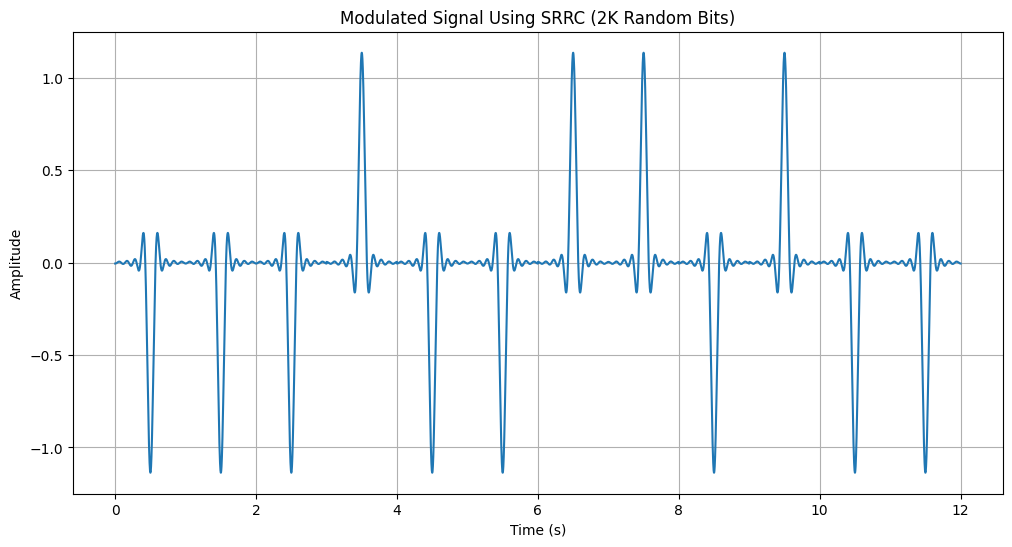

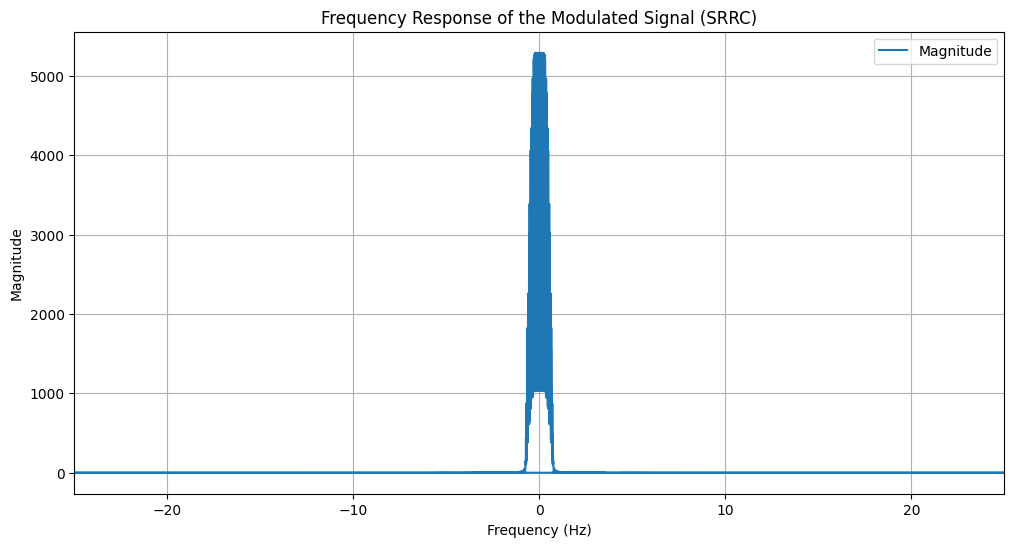

In [10]:

bits = np.random.randint(0, 2, 2*K)
print("Random Bits:", bits)
modulated_signal_srrc = []
for bit in bits:
    if bit == 1:
        modulated_signal_srrc.extend(x_t_b1)
    else:
        modulated_signal_srrc.extend(x_t_b0)


t_modulated_srrc = np.linspace(0, T*len(bits), len(modulated_signal_srrc))
plt.figure(figsize=(12, 6))
plt.plot(t_modulated_srrc, modulated_signal_srrc)
plt.title('Modulated Signal Using SRRC (2K Random Bits)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


modulated_signal_srrc_F = np.fft.fft(modulated_signal_srrc)
f_modulated_srrc = np.fft.fftfreq(len(t_modulated_srrc), d=1/Fs)
plt.figure(figsize=(12, 6))
plt.plot(f_modulated_srrc, np.abs(modulated_signal_srrc_F), label='Magnitude')
plt.title('Frequency Response of the Modulated Signal (SRRC)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim([-25, 25])
plt.grid(True)
plt.legend()
plt.show()


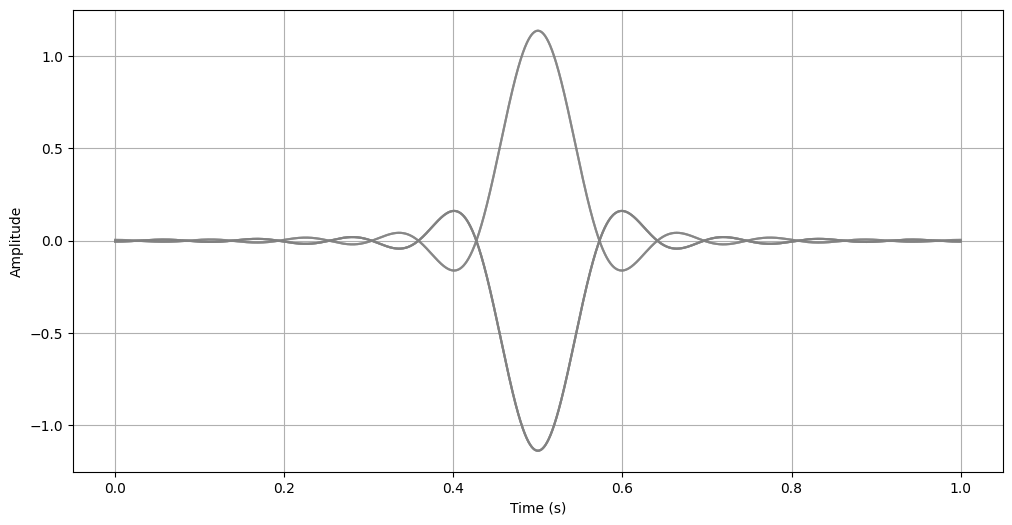

In [11]:
def plot_eye_diagram(signal, samples_per_symbol, num_symbols):
    plt.figure(figsize=(12, 6))
    time_per_symbol = np.linspace(0, T, samples_per_symbol)

    for i in range(num_symbols):
        start_idx = i * samples_per_symbol
        end_idx = start_idx + samples_per_symbol
        if end_idx <= len(signal):
            plt.plot(time_per_symbol, signal[start_idx:end_idx], color='gray', alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


samples_per_symbol = Fs * 2 * K
plot_eye_diagram(modulated_signal_srrc, samples_per_symbol, num_symbols=10)

# **Channel** **Effect**

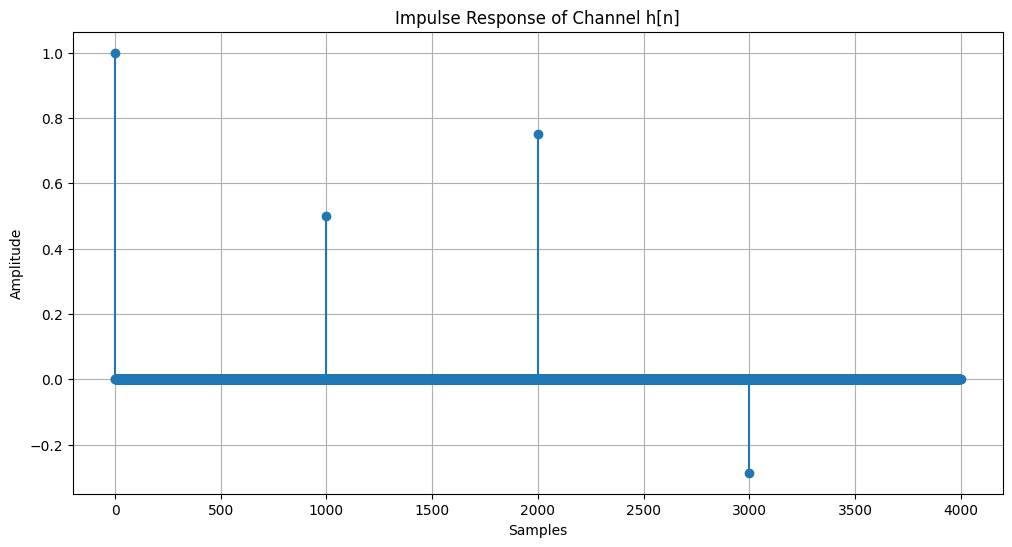

In [12]:
T = 1
Fs = 1000
samples_per_symbol = int(T * Fs)

h = np.zeros(4 * samples_per_symbol)
h[0] = 1.0
h[samples_per_symbol] = 1/2
h[2 * samples_per_symbol] = 3/4
h[3 * samples_per_symbol] = -2/7


H_f = np.fft.fft(h, n=1024)
f = np.fft.fftfreq(1024, d=1/Fs)

plt.figure(figsize=(12, 6))
plt.stem(np.arange(len(h)), h, basefmt=" ")
plt.title("Impulse Response of Channel h[n]")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)



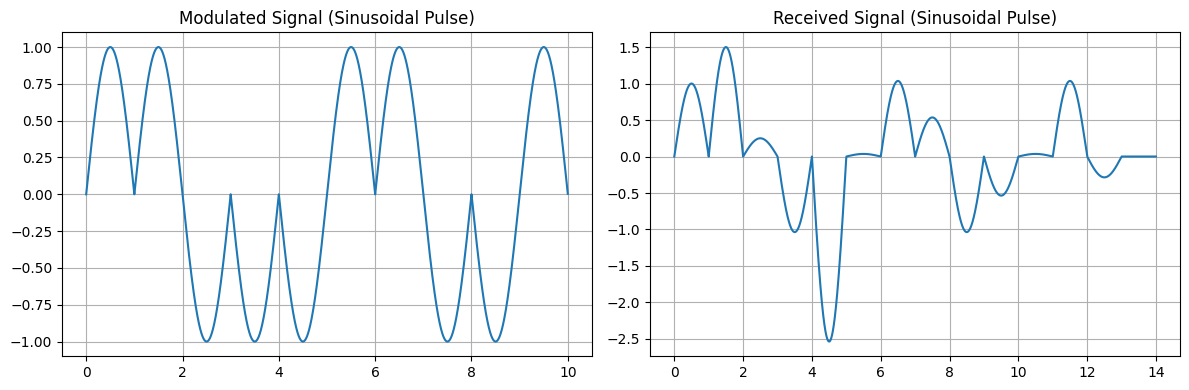

In [13]:
from scipy.signal import convolve
T = 1
Fs = 1000
samples_per_symbol = int(T * Fs)

t = np.linspace(0, T, samples_per_symbol, endpoint=False)
g1_t_b1 = np.sin(np.pi * t / T)
g1_t_b0 = -np.sin(np.pi * t / T)
num_bits = 10
bits = [1,1,0,0,0,1,1,0,0,1]
modulated_sin = np.concatenate([g1_t_b1 if bit == 1 else g1_t_b0 for bit in bits])
h = np.zeros(4 * samples_per_symbol)
h[0] = 1.0
h[samples_per_symbol] = 1/2
h[2 * samples_per_symbol] = 3/4
h[3 * samples_per_symbol] = -2/7

received_sin = np.convolve(modulated_sin, h, mode='full')
t_received_sin = np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_sin))
t_modulated = np.linspace(0, T*len(bits), len(modulated_sin))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t_modulated,modulated_sin)
plt.title("Modulated Signal (Sinusoidal Pulse)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_received_sin, received_sin)
plt.title("Received Signal (Sinusoidal Pulse)")
plt.grid(True)

plt.tight_layout()
plt.show()

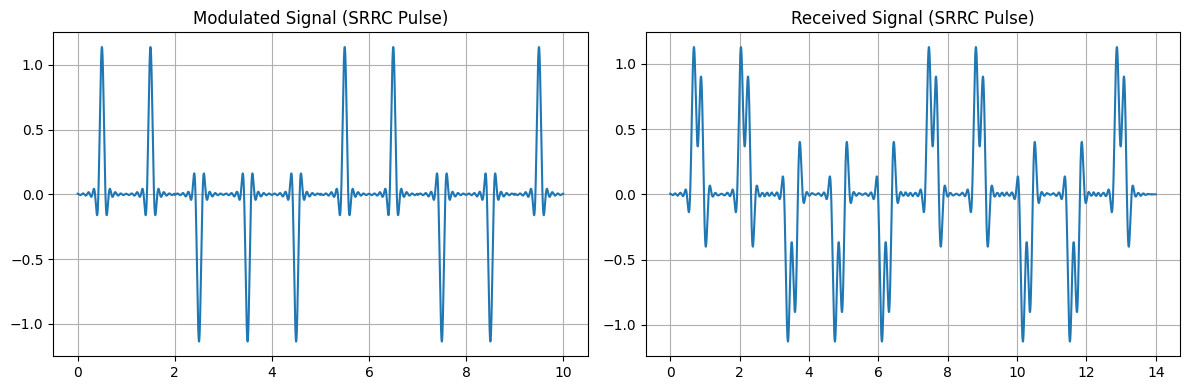

In [14]:
K = 6
b = 0.5
t = np.linspace(-K*T, K*T, Fs * 2 * K)

def srrc_pulse(t, T, b):
    numerator = np.sin(np.pi * t / T * (1 - b)) + 4 * b * t / T * np.cos(np.pi * t / T * (1 + b))
    denominator = np.pi * t / T * (1 - (4 * b * t / T) ** 2)

    x_t = np.zeros_like(t)
    mask_zero = (t == 0)
    mask_special = np.abs(t) == T / (4 * b)

    x_t[mask_zero] = (1 - b + 4 * b / np.pi)
    x_t[mask_special] = b / np.sqrt(2) * ((1 + 2 / np.pi) * np.sin(np.pi / (4 * b)) + (1 - 2 / np.pi) * np.cos(np.pi / (4 * b)))
    x_t[~(mask_zero | mask_special)] = numerator[~(mask_zero | mask_special)] / denominator[~(mask_zero | mask_special)]

    return x_t


g1_t_b1 = srrc_pulse(t, T, b)
g1_t_b0 = -srrc_pulse(t, T, b)
num_bits = 10
bits = [1, 1, 0, 0, 0, 1, 1, 0, 0, 1]


modulated_srrc = np.concatenate([g1_t_b1 if bit == 1 else g1_t_b0 for bit in bits])
received_srrc = np.convolve(modulated_srrc, h, mode='full')


t_modulated_srrc = np.linspace(0, T * len(bits), len(modulated_srrc))
t_received_srrc = np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_srrc))


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t_modulated_srrc, modulated_srrc)
plt.title("Modulated Signal (SRRC Pulse)")
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(t_received_srrc, received_srrc)
plt.title("Received Signal (SRRC Pulse)")
plt.grid(True)

plt.tight_layout()
plt.show()


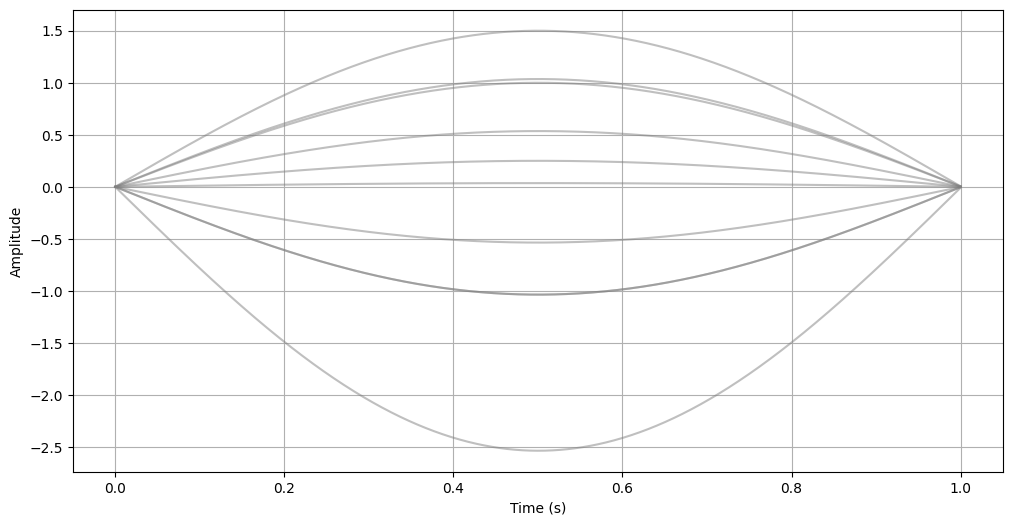

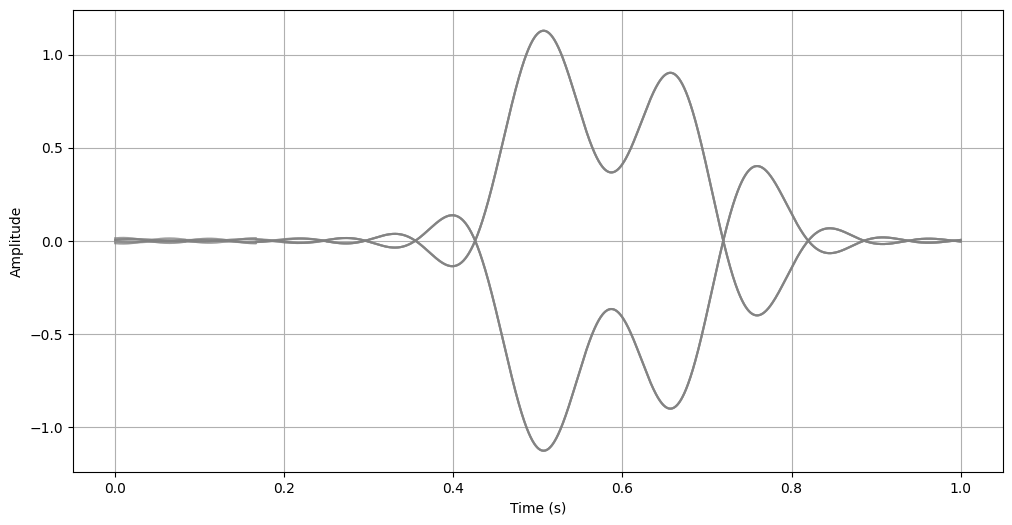

In [15]:
plot_eye_diagram(received_sin, samples_per_symbol,  num_symbols=10)
plot_eye_diagram(received_srrc, 12000,  num_symbols=10)

# **Noise**

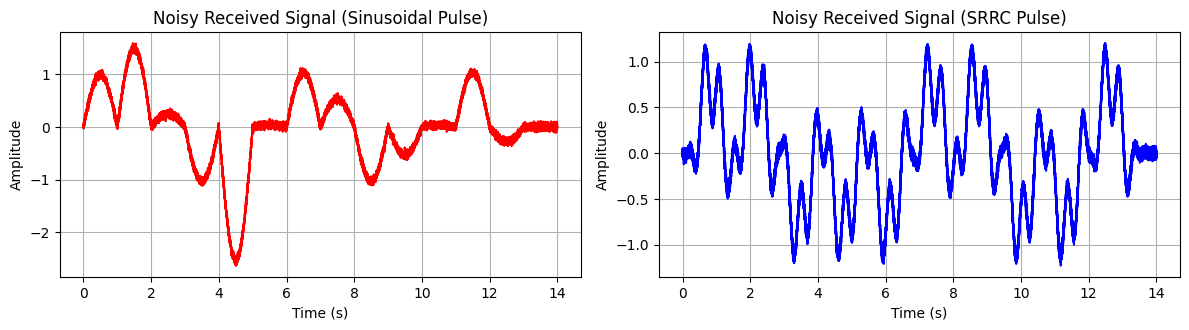

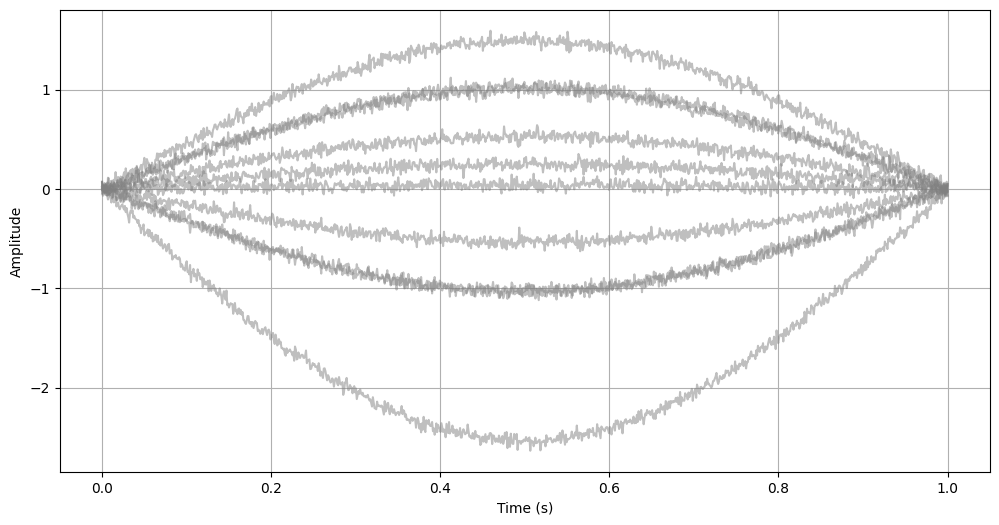

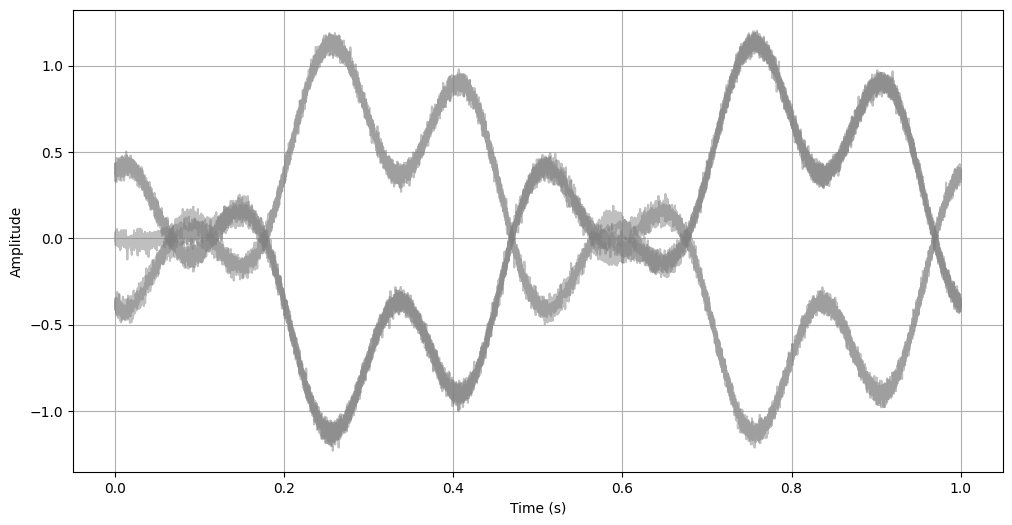

In [16]:
t = np.linspace(0, T, samples_per_symbol, endpoint=False)

g1_t_b1 = np.sin(np.pi * t / T)
g1_t_b0 = -np.sin(np.pi * t / T)

def srrc_pulse(alpha, span, sps):
    t = np.arange(-span * sps / 2, span * sps / 2) / sps
    pi_t = np.pi * t
    with np.errstate(divide='ignore', invalid='ignore'):
        pulse = (np.sin(pi_t * (1 - alpha)) +
                 4 * alpha * t * np.cos(pi_t * (1 + alpha))) / \
                (pi_t * (1 - (4 * alpha * t)**2))
    pulse[t == 0] = 1 - alpha + (4 * alpha / np.pi)
    pulse[np.abs(4 * alpha * t) == 1] = (alpha / np.sqrt(2)) * ((1 + 2/np.pi) *
                                                                 np.sin(np.pi / (4 * alpha)) +
                                                                 (1 - 2/np.pi) * np.cos(np.pi / (4 * alpha)))
    return pulse

b = 0.5
K = 6
g2_t = srrc_pulse(b, K, samples_per_symbol)



bits = [1,1,0,0,0,1,1,0,0,1]
modulated_sin = np.concatenate([g1_t_b1 if bit == 1 else g1_t_b0 for bit in bits])
modulated_srrc = np.concatenate([g2_t if bit == 1 else -g2_t for bit in bits])
received_sin = np.convolve(modulated_sin, h, mode='full')
received_srrc = np.convolve(modulated_srrc, h, mode='full')

noise_level=0.05
power_sin = np.mean(received_sin ** 2)
power_srrc = np.mean(received_srrc ** 2)
sigma_sin = np.sqrt(power_sin) * noise_level
sigma_srrc = np.sqrt(power_srrc) * noise_level
received_sin_noisy = received_sin + sigma_sin * np.random.randn(len(received_sin))
received_srrc_noisy = received_srrc + sigma_srrc * np.random.randn(len(received_srrc))
t_received_sin = np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_sin))
t_received_srrc = np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_srrc))
t_modulated = np.linspace(0, T*len(bits), len(modulated_sin))


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t_received_sin, received_sin_noisy, color='r')
plt.title("Noisy Received Signal (Sinusoidal Pulse)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(t_received_srrc, received_srrc_noisy, color='b')
plt.title("Noisy Received Signal (SRRC Pulse)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


plot_eye_diagram(received_sin_noisy, samples_per_symbol, num_symbols=10)
plot_eye_diagram(received_srrc_noisy, 12000, num_symbols=10)


# **Matched Filter**

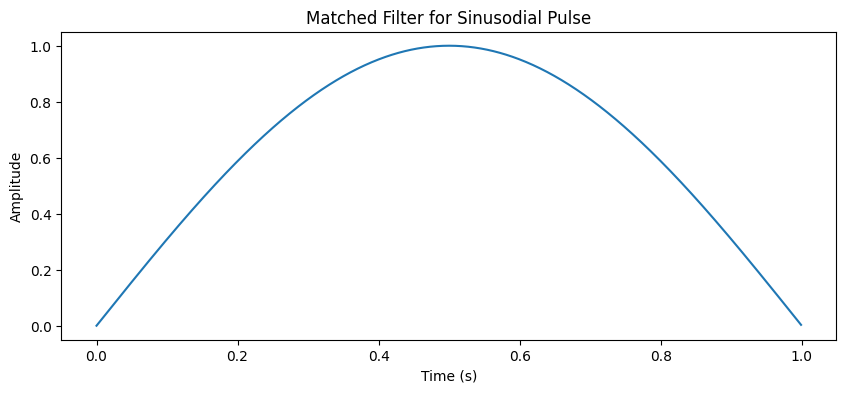

In [17]:
matched_filter1 = np.sin(np.pi * (T-t) / T)

plt.figure(figsize=(10, 4))
plt.plot(t, matched_filter1)
plt.title('Matched Filter for Sinusodial Pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


<ipython-input-18-712bf605910b>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


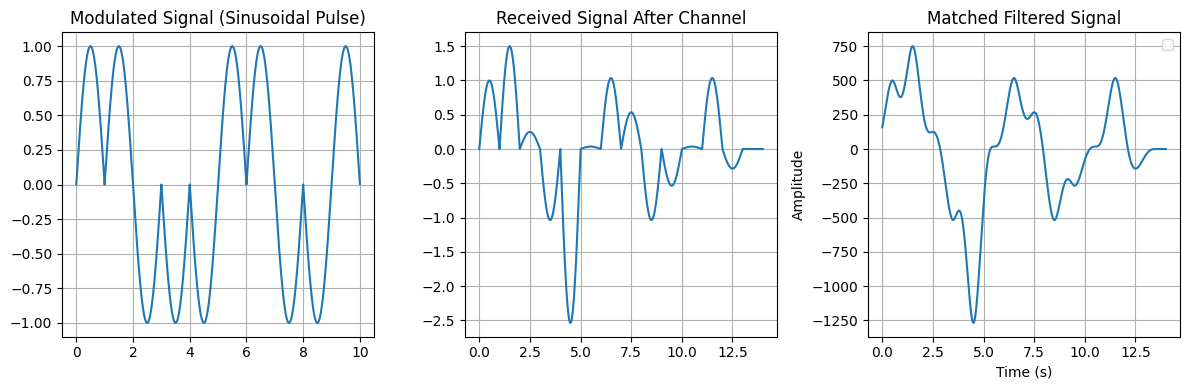

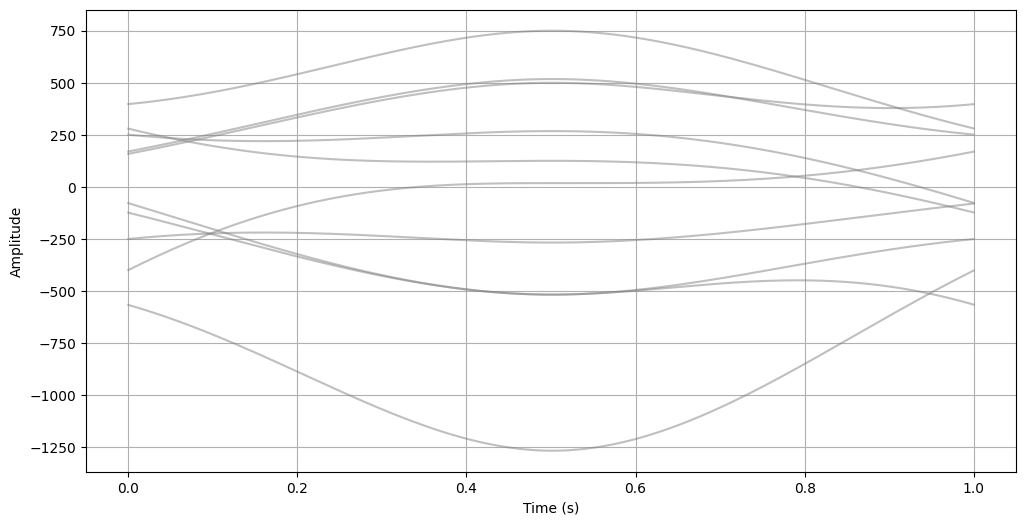

In [18]:
t = np.linspace(0, T, samples_per_symbol, endpoint=False)
sin_matchedfilter_out = convolve(received_sin, matched_filter1, mode='same')
plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.plot(t_modulated, modulated_sin)
plt.title("Modulated Signal (Sinusoidal Pulse)")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t_received_sin, received_sin)
plt.title("Received Signal After Channel")
plt.grid(True)


plt.subplot(1, 3, 3)
plt.plot(t_received_sin, sin_matchedfilter_out)
plt.title("Matched Filtered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


plot_eye_diagram(sin_matchedfilter_out, samples_per_symbol, num_symbols=10)


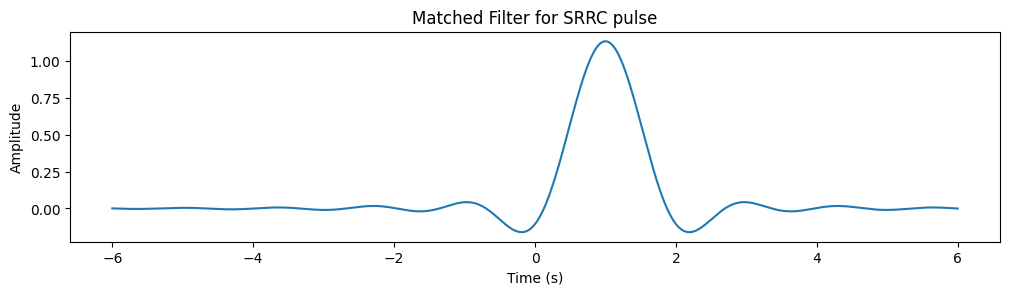

In [19]:
t = np.linspace(-K*T, K*T, Fs * 2 * K)
def Matched_Filter2(t, T, b):
    numerator = np.sin(np.pi * (T-t) / T * (1 - b)) + 4 * b * (T-t) / T * np.cos(np.pi * (T-t) / T * (1 + b))
    denominator = np.pi * (T-t) / T * (1 - (4 * b * (T-t) / T) ** 2)
    x_t = np.zeros_like(t)
    mask_zero = (t == 0)
    mask_special = np.abs(t) == T / (4 * b)
    x_t[mask_zero] = (1 - b + 4 * b / np.pi)
    x_t[mask_special] = b / np.sqrt(2) * ((1 + 2 / np.pi) * np.sin(np.pi / (4 * b)) + (1 - 2 / np.pi) * np.cos(np.pi / (4 * b)))
    x_t[~(mask_zero | mask_special)] = numerator[~(mask_zero | mask_special)] / denominator[~(mask_zero | mask_special)]
    return x_t



matched_filter2 = Matched_Filter2(t, T, b)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, matched_filter2)
plt.title('Matched Filter for SRRC pulse')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


<ipython-input-20-6d6f735b18a9>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


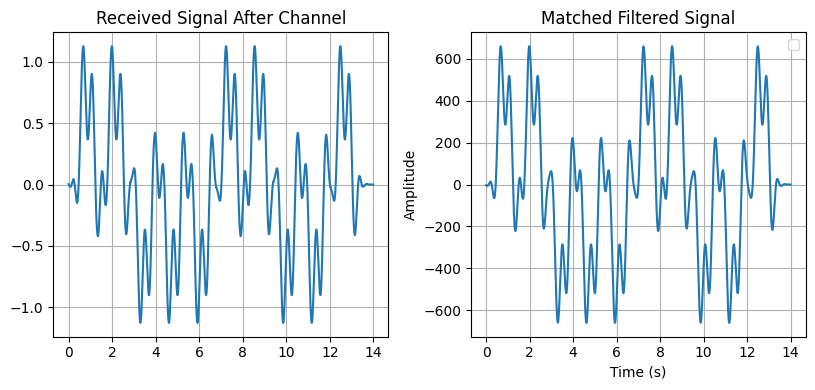

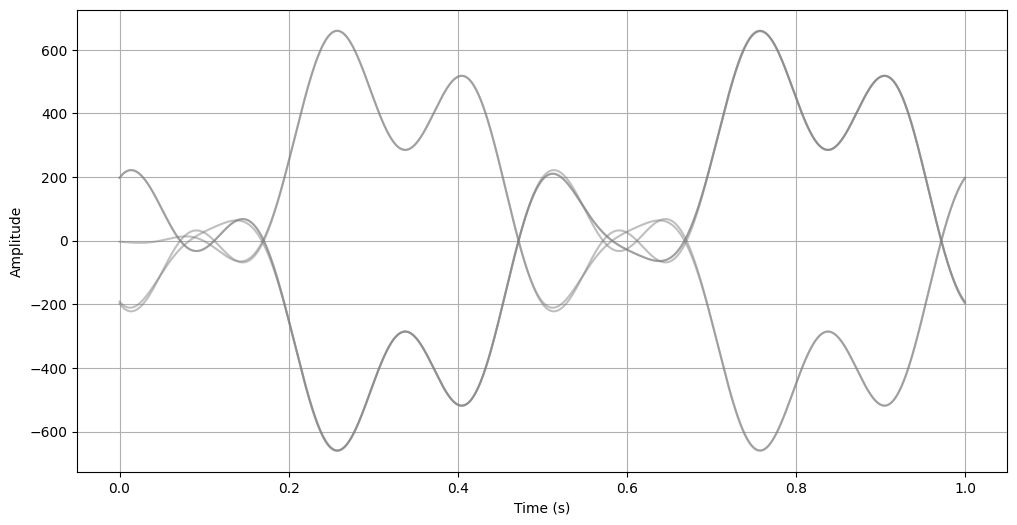

In [20]:
t = np.linspace(-K*T, K*T, Fs * 2 * K)
srrc_matched_filtered_out = convolve(received_srrc, matched_filter1, mode='same')


plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 2)
plt.plot(t_received_srrc, received_srrc)
plt.title("Received Signal After Channel")
plt.grid(True)


plt.subplot(1, 3, 3)
plt.plot(t_received_srrc, srrc_matched_filtered_out)
plt.title("Matched Filtered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

plot_eye_diagram(srrc_matched_filtered_out, 12000, num_symbols=10)


# **Equalizer**

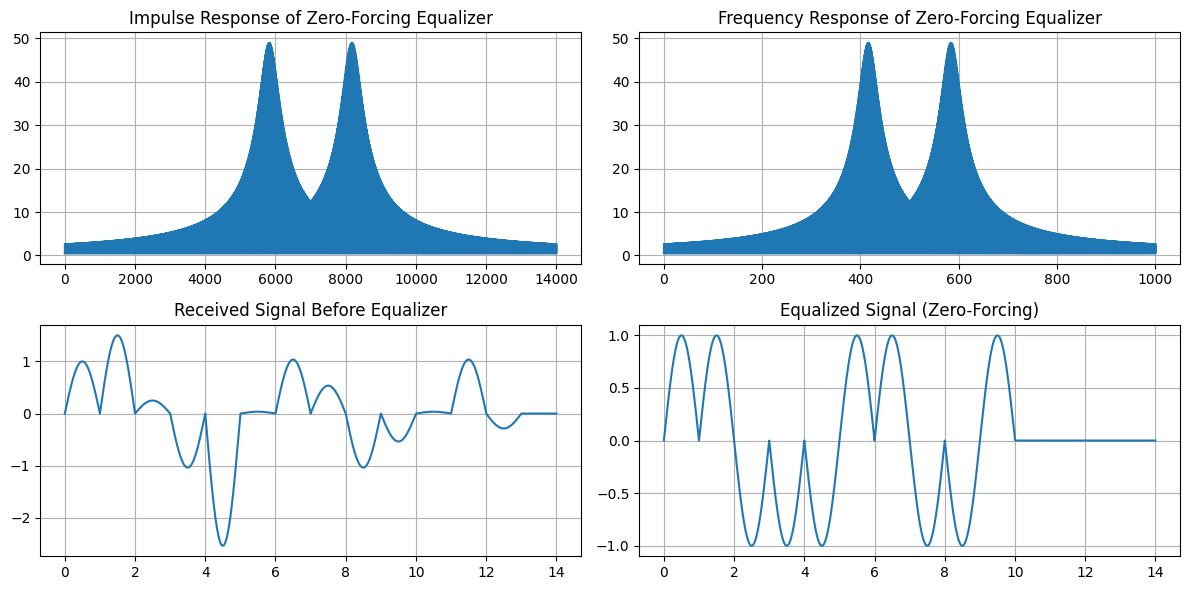

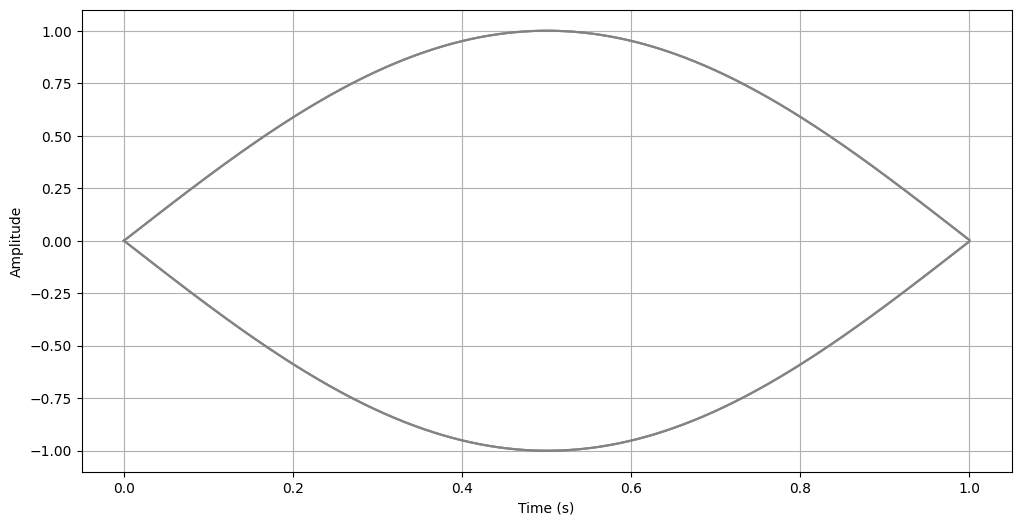

In [ ]:
from scipy.signal import convolve
from scipy.fft import fft, ifft

H_f = fft(h, len(received_sin))
Q_zf_f = 1 / H_f
Q_zf_f[np.isnan(Q_zf_f)] = 0
received_sin_f = fft(received_sin)
equalized_sin_f = received_sin_f * Q_zf_f
equalized_sin = ifft(equalized_sin_f)


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(Q_zf_f)), np.abs(Q_zf_f))
plt.title("Impulse Response of Zero-Forcing Equalizer")
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, Fs, len(Q_zf_f)), np.abs(Q_zf_f))
plt.title("Frequency Response of Zero-Forcing Equalizer")
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(t_received_sin, received_sin)
plt.title("Received Signal Before Equalizer")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t_received_sin, np.real(equalized_sin))
plt.title("Equalized Signal (Zero-Forcing)")
plt.grid(True)

plt.tight_layout()
plt.show()


plot_eye_diagram(np.real(equalized_sin), samples_per_symbol, num_symbols=10)


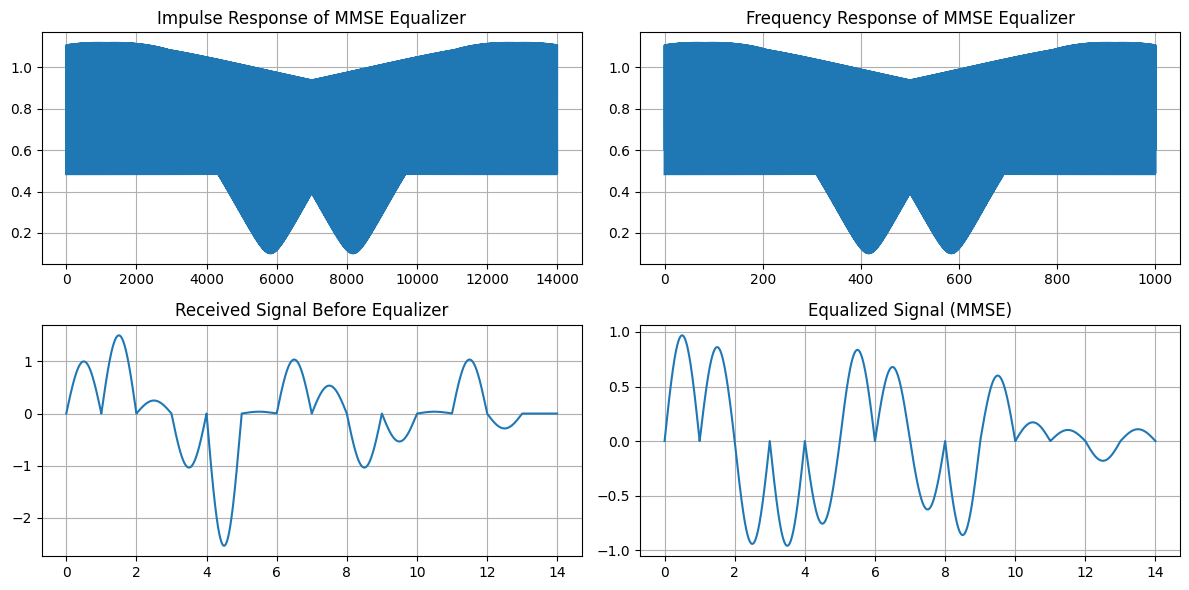

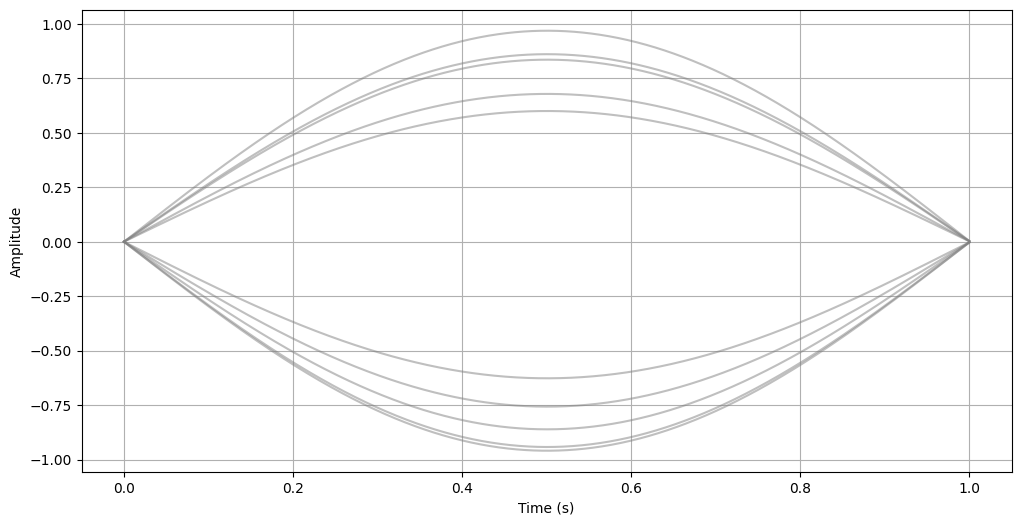

In [ ]:
from scipy.signal import convolve
from scipy.fft import fft, ifft

H_f = fft(h, len(received_sin))
sigma2 = 0.1

Q_mmse_f = np.conj(H_f) / (np.abs(H_f)**2 + 2 * sigma2)
received_sin_f = fft(received_sin)
equalized_sin_f = received_sin_f * Q_mmse_f
equalized_sin = ifft(equalized_sin_f)


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(np.arange(len(Q_mmse_f)), np.abs(Q_mmse_f))
plt.title("Impulse Response of MMSE Equalizer")
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, Fs, len(Q_mmse_f)), np.abs(Q_mmse_f))
plt.title("Frequency Response of MMSE Equalizer")
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(t_received_sin, received_sin)
plt.title("Received Signal Before Equalizer")
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(t_received_sin, np.real(equalized_sin))
plt.title("Equalized Signal (MMSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

plot_eye_diagram(np.real(equalized_sin), samples_per_symbol, num_symbols=10)


# **Equalizer with Noise**

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


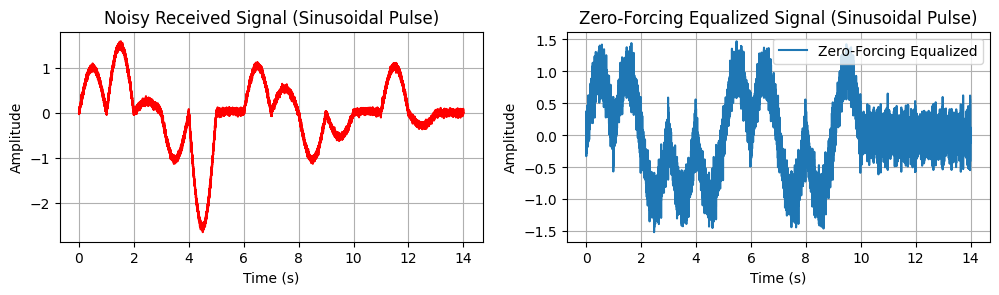

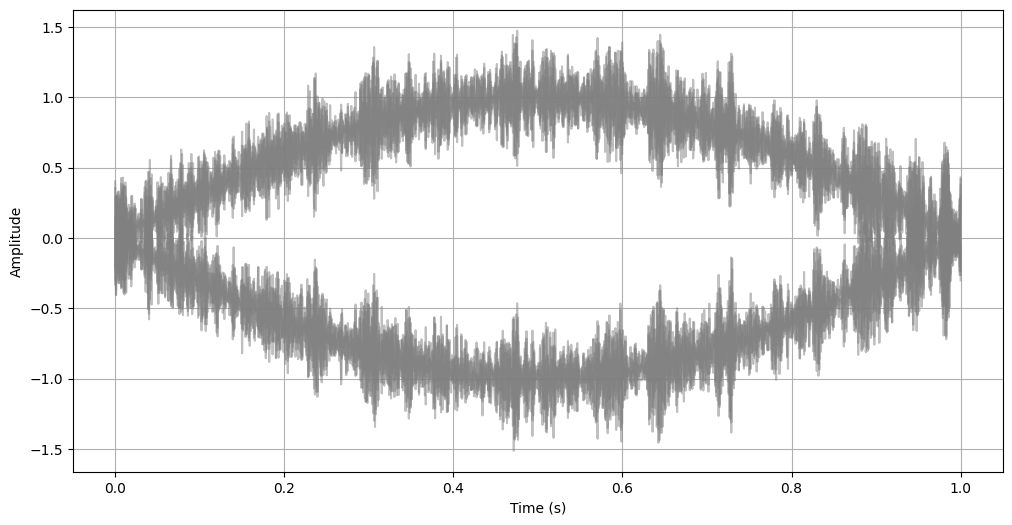

In [ ]:
H = np.fft.fft(h, len(received_sin_noisy))
H_inv = 1 / H
received_sin_zfe = np.fft.ifft(np.fft.fft(received_sin_noisy) * H_inv)
t_received_sin = np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_sin))

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t_received_sin, received_sin_noisy, color='r')
plt.title("Noisy Received Signal (Sinusoidal Pulse)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(t_received_sin, received_sin_zfe, label='Zero-Forcing Equalized')
plt.title("Zero-Forcing Equalized Signal (Sinusoidal Pulse)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()


plot_eye_diagram(received_sin_zfe, samples_per_symbol, num_symbols=10)


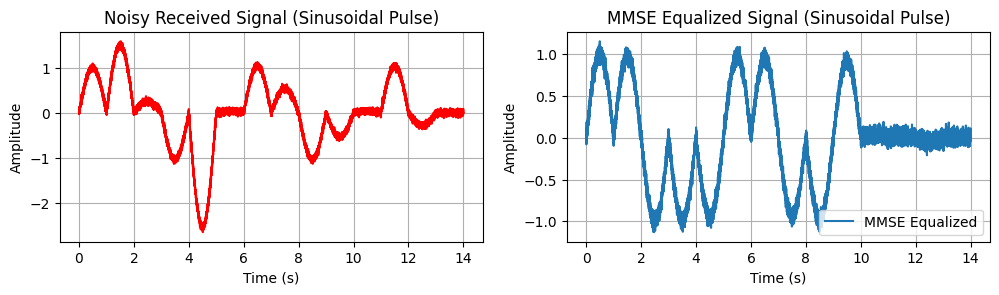

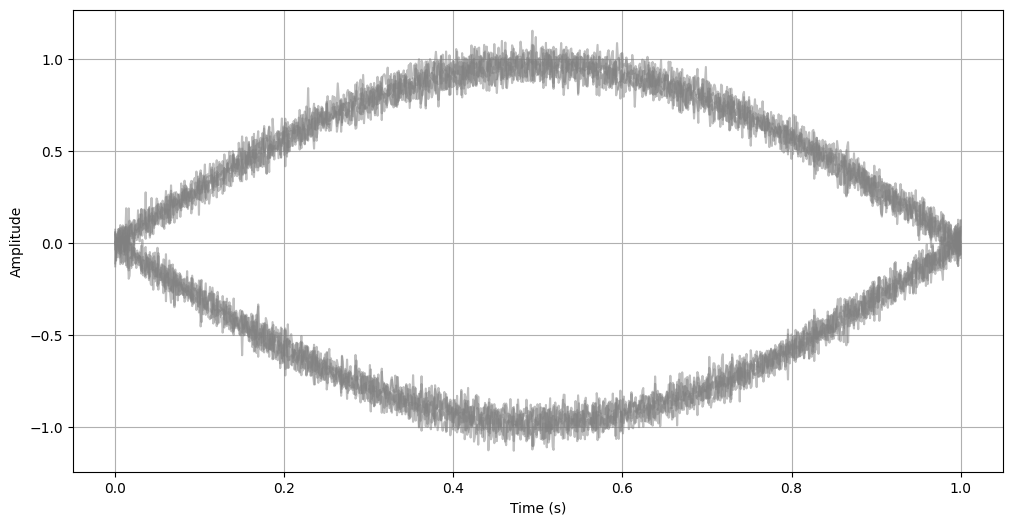

In [ ]:
H = np.fft.fft(h, len(received_sin_noisy))
H_star = np.conj(H)
sigma = 0.1
H_mse = H_star / (np.abs(H) ** 2 + 2 * sigma ** 2)
received_sin_mmse = np.fft.ifft(np.fft.fft(received_sin_noisy) * H_mse)
t_received_sin = np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_sin))


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(t_received_sin, received_sin_noisy, color='r')
plt.title("Noisy Received Signal (Sinusoidal Pulse)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(t_received_sin, received_sin_mmse, label='MMSE Equalized')
plt.title("MMSE Equalized Signal (Sinusoidal Pulse)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()


plot_eye_diagram(received_sin_mmse, samples_per_symbol, num_symbols=10)


# **Sampling**

[1, 1, 0, 0, 0, 1, 1, 0, 0, 1]


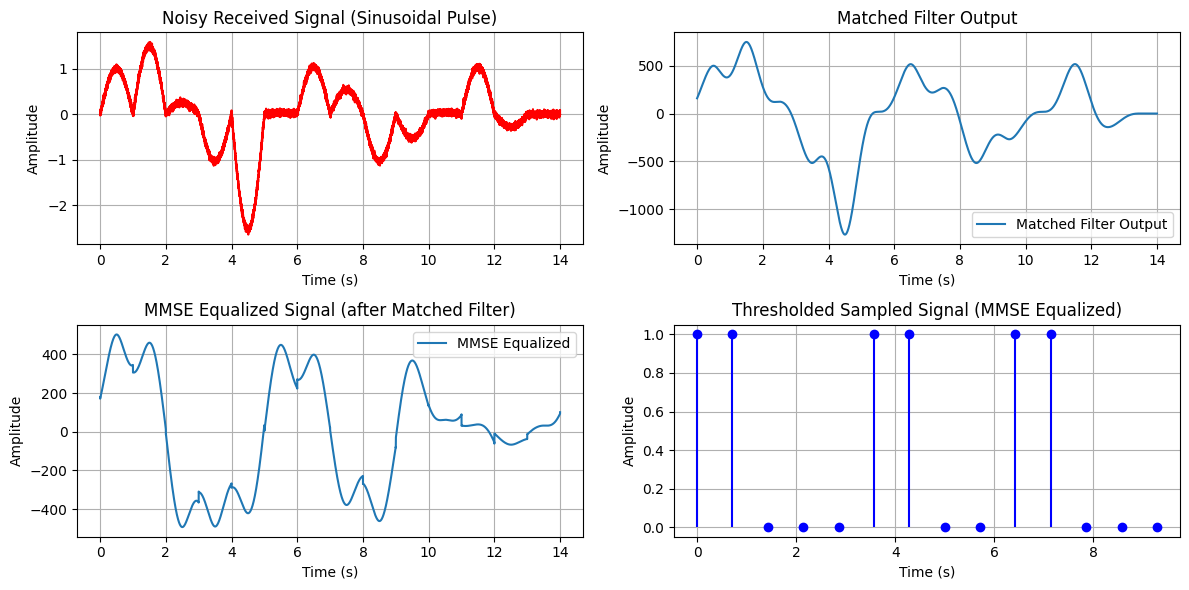

In [ ]:
received_sin_matched = np.convolve(received_sin_noisy, matched_filter1, mode='same')
H = np.fft.fft(h, len(received_sin_matched))
H_star = np.conj(H)
sigma2 = 0.1
H_mmse = H_star / (np.abs(H) ** 2 + sigma2)
received_sin_mmse = np.fft.ifft(np.fft.fft(received_sin_matched) * H_mmse)


sampled_signal = received_sin_mmse[samples_per_symbol//2::samples_per_symbol]

max_amp = np.max(np.abs(sampled_signal))
sampled_signal_normalized = sampled_signal / max_amp

threshold = 0.1
sampled_signal_thresholded = np.where(sampled_signal_normalized > threshold, 1, 0)

t_sampled = np.linspace(0, T * len(bits), len(sampled_signal), endpoint=False)
plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
plt.plot(np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_sin)), received_sin_noisy, color='r')
plt.title("Noisy Received Signal (Sinusoidal Pulse)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_sin_matched)), received_sin_matched, label='Matched Filter Output')
plt.title("Matched Filter Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(np.linspace(0, T * len(bits) + (len(h) - 1) / Fs, len(received_sin_mmse)), received_sin_mmse, label='MMSE Equalized')
plt.title("MMSE Equalized Signal (after Matched Filter)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 4)
plt.stem(t_sampled, sampled_signal_thresholded, 'b', markerfmt='bo', basefmt=" ")
plt.title("Thresholded Sampled Signal (MMSE Equalized)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout( )
print(bits)


# Block Diagram and Complete System Implementation

In [ ]:
!pip install pyfftw

In [ ]:
import numpy as np
import cv2
import pyfftw
from scipy.signal import fftconvolve
from scipy.fftpack import dct, idct
from skimage.util import view_as_blocks
import matplotlib.pyplot as plt
import gc
def pulse_generator(bits, pulse1, pulse0):
    return np.concatenate(np.where(bits[:, None] == 1, pulse1, pulse0))

def channel_effect(signal, h):
    return fftconvolve(signal, h, mode='full')

def add_noise(signal, noise_level=0.05):
    power = np.mean(signal ** 2)
    sigma = np.sqrt(power) * noise_level
    return signal + sigma * np.random.randn(len(signal))

def matched_filter(signal_noisy, matched_filter):
    return fftconvolve(signal_noisy, matched_filter[::-1], mode='same')

def mmse_equalizer(signal, h, noise_variance=0.1):
    H = pyfftw.interfaces.numpy_fft.fft(h, len(signal))
    H_mmse = np.conj(H) / (np.abs(H)**2 + noise_variance)
    signal_fft = pyfftw.interfaces.numpy_fft.fft(signal)
    return np.real(pyfftw.interfaces.numpy_fft.ifft(signal_fft * H_mmse))

def sampling(signal, samples_per_symbol, num_bits, threshold=0.1):
    sampled = signal[samples_per_symbol // 2::samples_per_symbol][:num_bits]
    return (sampled > threshold).astype(np.uint8)

def full_system(bitstream, pulse1, pulse0, h,
                noise_level=0.05, noise_variance=0.1,
                samples_per_symbol=100):
    modulated = pulse_generator(bitstream, pulse1, pulse0)
    received = channel_effect(modulated, h)
    received_noisy = add_noise(received, noise_level)
    filtered = matched_filter(received_noisy, pulse1)
    equalized = mmse_equalizer(filtered, h, noise_variance)
    return sampling(equalized, samples_per_symbol, len(bitstream))

In [ ]:
bits = np.array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

T = 1
t = np.linspace(0, T, 1000, endpoint=False)
modulation_pulse = np.sin(np.pi * t / T)
demodulation_pulse = -np.sin(np.pi * t / T)
samples_per_symbol = 1000
h = np.zeros(4 * samples_per_symbol)
h[0] = 1.0
h[samples_per_symbol] = 1/2
h[2 * samples_per_symbol] = 3/4
h[3 * samples_per_symbol] = -2/7


final_sampled_signal = full_system(bits, modulation_pulse, demodulation_pulse, h,
                                   noise_level=0.05, noise_variance=0.1,
                                   samples_per_symbol=samples_per_symbol)

print("Original Bits:       ", bits)
print("Detected Bits:       ", final_sampled_signal)

Original Bits:        [1 1 1 0 0 1 1 0 0 1]
Detected Bits:        [1 1 1 0 0 1 1 0 0 1]
